Цель проекта - провести исследование рынка для принятия дальнейшего решения об открытии небольшого кафе в Москве. 
В распоряжении есть открытые данные о заведениях общественного питания в Москве.

Таблица с данными:
- id — идентификатор объекта
- object_name — название объекта общественного питания
- chain — сетевой ресторан
- object_type — тип объекта общественного питания
- address — адрес
- number — количество посадочных мест

Задачи:
- Исследовать соотношение видов объектов общественного питания по количеству
- Исследовать соотношение сетевых и несетевых заведений по количеству
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? 
- Построить графики топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?
- Найти число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?
- Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

In [49]:
data = pd.read_csv('/Users/kirillshaplyko1/Yandex.Disk.localized/Обучение/Яндекс практикум/Проекты/rest_data.csv')
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В таблице присутствуют дубликаты, однако у них разный id. По имени удалять дубликаты нельзя, так как от этого пострадают строчки по сетевым заведениям. Придется списать это на погрешность.

# Анализ данных

**1. Количество по видам объектов питания**

In [51]:
object_type = data.groupby('object_type').agg({'id': 'count'}).reset_index()
object_type.columns=['object_type','number']
object_type.head()

,object_type,number
0,бар,856
1,буфет,585
2,закусочная,360
3,кафе,6099
4,кафетерий,398


In [52]:
fig = px.bar(object_type,x='object_type',y='number')
fig.show()

Чаще всего в Москве встречаются кафе. Так же существенную часть, в среднем около или больше 2-х тысяч - столовая, ресторан и фаст фуд.

**2. Сетевые и несетевые объекты**

In [53]:
chain = data.groupby('chain').agg({'id': 'count'}).reset_index()
chain.columns=['chain','number']
chain.head()

,chain,number
0,да,2968
1,нет,12398


In [54]:
fig = px.bar(chain,x='chain',y='number')
fig.show()

При этом в городе преобладают преимущественно несетевые заведения.

**3. Для какого типа характерно сетевое распространение**

In [55]:
data.pivot_table(index='object_type',columns='chain',values='id',aggfunc='count').sort_values(by='да',ascending=False)

chain,да,нет
object_type,,
кафе,1396,4703
предприятие быстрого обслуживания,791,1132
ресторан,544,1741
магазин (отдел кулинарии),78,195
закусочная,56,304
кафетерий,52,346
бар,37,819
буфет,11,574
столовая,3,2584


Чаще других сетевыми заведениями являются кафе, фаст фуд и рестораны.

**4. Количество заведений в сети и посадочные места**

In [56]:
chain = data.query('chain == "да"')
chain.head()

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160


In [57]:
chain_pivot = chain.pivot_table(index='object_name',values=['id','number'],aggfunc=['count','sum']).reset_index()
chain_pivot.columns=['object_name','count','number_sum','sum_id','sum_number']
chain_pivot = chain_pivot.drop(['number_sum','sum_id'],axis=1)
chain_pivot['mean_n']=chain_pivot['sum_number']/chain_pivot['count']

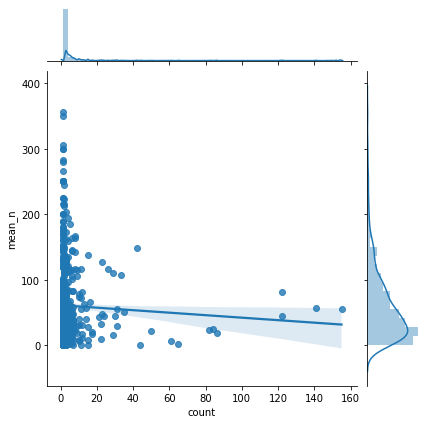

In [58]:
sns.jointplot(x='count',y='mean_n', data=chain_pivot, kind='reg')

Для сетевых заведений картина разная. Встречаются и небольшие сети с большим количеством посадочных мест. Бывают и большие сети с меньшим количеством посадочных мест. Среднее распределение - сеть в 10 заведений с 50 посадочными местами.

**5. Среднее количество посадочных мест по типам заведений**

In [59]:
chain_pivot_type = chain.pivot_table(index='object_type',values=['id','number'],aggfunc=['count','mean']).reset_index()
chain_pivot_type.columns=['object_type','count','number_count','mean_id','mean_number']
chain_pivot_type = chain_pivot_type.drop(['number_count','mean_id'],axis=1)
chain_pivot_type.head(10)

,object_type,count,mean_number
0,бар,37,53.027027
1,буфет,11,12.727273
2,закусочная,56,14.375000
3,кафе,1396,47.426934
4,кафетерий,52,12.269231
5,магазин (отдел кулинарии),78,8.679487
6,предприятие быстрого обслуживания,791,40.166877
7,ресторан,544,100.233456
8,столовая,3,112.333333


In [60]:
fig = px.bar(chain_pivot_type,x='object_type',y='mean_number')
fig.show()

Для баров, кафе и фаст фуда среднее число посадочных мест от 40 до 50. Для ресторанов и столовых - более 100.
Связано это с тем, что рестораны и столовые все таки рассчитаны на большое количество людей одновременно. Для столовых и ресторанов может быть характерно время обеда, когда работники из офисов приходят на бизнес-ланч. Помимо этого для ресторанов актуально вечернее время и выходные.
В то время как кафе и фаст фуд имеют более высокую проходимость - перекусить и выпить кофе в течение дня. 
Бары в основном это небольшие заведения. Редко можно встретить большой сетевой бар. В основном это не такие большие тематические заведения.

**6. Улицы**

In [61]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [62]:
address = data['address'].str.split(',',expand=True)
address.head()

,0,1,2,3,4,5,6
0,город Москва,улица Егора Абакумова,дом 9,None,None,None,None
1,город Москва,улица Талалихина,дом 2/1,корпус 1,None,None,None
2,город Москва,Абельмановская улица,дом 6,None,None,None,None
3,город Москва,Абрамцевская улица,дом 1,None,None,None,None
4,город Москва,Абрамцевская улица,дом 9,корпус 1,None,None,None


In [63]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       15366 non-null  object
 1   1       15366 non-null  object
 2   2       15346 non-null  object
 3   3       7159 non-null   object
 4   4       464 non-null    object
 5   5       118 non-null    object
 6   6       1 non-null      object
dtypes: object(7)
memory usage: 840.5+ KB


Информация в ячейке с адресом не всегда записана в формате "город-улица-дом". Выделим строки, где в первом столбце записан город Москва

In [64]:
address = address[address[0] == 'город Москва']
address[0].value_counts()

город Москва    15295
Name: 0, dtype: int64

Таких значений оказалось не намного меньше изначального массива. Теперь точно в столбце [1] записано название улицы.

In [65]:
address = address.iloc[:,[1]]

In [66]:
address.columns=['street']
address.tail(10)

,street
15356,Митинская улица
15357,площадь Джавахарлала Неру
15358,Варшавское шоссе
15359,Кантемировская улица
15360,улица Вавилова
15361,3-й Крутицкий переулок
15362,улица Земляной Вал
15363,улица Земляной Вал
15364,поселение Московский
15365,Ходынский бульвар


Добавим отдельное название улицы в изначальные данные.

In [67]:
data = data.join(address)

In [68]:
data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


**7. Топ-10 улиц по количеству заведений**

Для определения района по каждой улице воспользуюсь открытыми внешними данными со списком кафе и адресов

In [83]:
districts = pd.read_excel('/Users/kirillshaplyko1/Yandex.Disk.localized/Обучение/Яндекс практикум/Проекты/districts.xlsx')
districts.head(1)

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geoData
0,151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",(499) 183-14-10,48,нет,37.714565,55.879002,"{type=Point, coordinates=[37.71456500043604, 5..."


In [70]:
district_id = districts.iloc[:,[0,7]]
district_id.head(1)

,ID,District
0,151635,Ярославский район


In [71]:
data = data.join(district_id)
data.head(1)

,id,object_name,chain,object_type,address,number,street,ID,District
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,151635,Ярославский район


In [72]:
top10_streets = data.pivot_table(index='street',values='id',aggfunc='count').sort_values(by='id',ascending=False).reset_index()
top10_streets.columns = ['street','number']
top10_streets.head(10)
top10_streets = top10_streets.query('number >= 114')

In [73]:
fig = px.bar(top10_streets,x='street',y='number')
fig.show()

Город Зеленоград расположился на первом месте. Формально это район Москвы, но по факту туда наверняка входят множество заведений со множества улиц, поэтому его для нашего вопроса не учитываем.
Проспект Мира протянулся от Садового кольца в СВАО. 
Профсоюзная улица расположена в ЮЗАО, Ленинградский проспект начинается от Белорусской. Судя по опыту, скорее всего здесь множество сетевых заведений, расположившихся на выездных из города магистралях. В то время как большинство заведений должно располагаться в центре, но с меньшим количеством заведений в сети, одиночные точки. Проверим это.

**8. Улицы с одним объектом**

In [74]:
data.head(1)

,id,object_name,chain,object_type,address,number,street,ID,District
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,151635,Ярославский район


In [75]:
one_object_street = data.groupby('address')['id'].agg('count').reset_index()
one_object_street.columns = ['address','objects']
one_object_street.head()
one_object_street = one_object_street[one_object_street['objects'] == 1]
one_object_street.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6920 entries, 0 to 9107
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  6920 non-null   object
 1   objects  6920 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 162.2+ KB


In [76]:
one_object_street = one_object_street.merge(data.iloc[:,[4,8]],on='address',how='inner')

In [77]:
top_one_object_street = one_object_street['District'].value_counts().head()
top_one_object_street.head()

Тверской район       241
Пресненский район    227
район Хамовники      219
Басманный район      209
Таганский район      179
Name: District, dtype: int64

Больше всего улиц с одним заведением располагается в центральных районах, как мы и предполагали. Это может быть связано так же с длинной улиц - в центре пребладают короткие улицы.

**9. Распределение посадочных мест по улицам с большим количеством заведений**

In [78]:
data.head()

,id,object_name,chain,object_type,address,number,street,ID,District
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,151635,Ярославский район
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,77874,Таганский район
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,24309,Таганский район
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,21894,район Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,119365,район Лианозово


In [79]:
street_number = data.pivot_table(index='street',values=['id','number'], aggfunc=['count','mean'])
street_number.columns = ['count_id','count_venue','mean_id','mean_number']
street_number.head()
street_number = street_number.drop(['count_venue','mean_id'],axis=1)
street_number.sort_values(by='count_id',ascending=False).head()

,count_id,mean_number
street,,
город Зеленоград,232,73.491379
проспект Мира,204,62.696078
Профсоюзная улица,182,46.412088
Ленинградский проспект,171,52.690058
Пресненская набережная,167,45.844311


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8613c2fa60>,
      dtype=object)

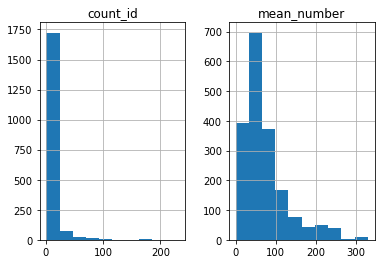

In [80]:
street_number.hist()

In [81]:
street_number_top = street_number.query('count_id > 50')

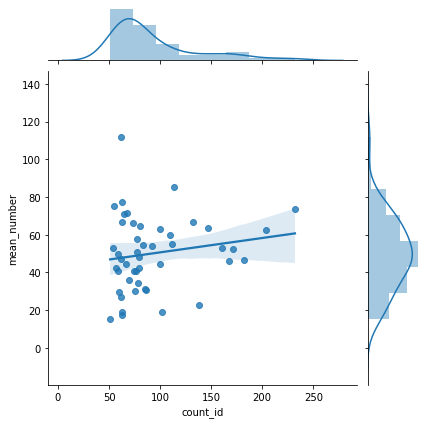

In [82]:
sns.jointplot(x='count_id',y='mean_number', data=street_number_top, kind='reg')

Однозначного вывода сделать нельзя. В среднем есть тренд на рост числа посадочных мест в заведении с ростом числа заведений на улице, то есть с плотностью заведений. Чаще всего встречаются по 50-100 заведений на одну улицу со средним числом посадочных мест от 40 до 60.

# Общие выводы

- Чаще всего в Москве встречаются кафе. Так же существенную часть, в среднем около или больше 2-х тысяч заведений каждые - столовые, рестораны и фаст фуд.
- Чаще всего встречаются по 50-100 заведений на одну улицу со средним числом посадочных мест от 40 до 60.
- При этом в городе преобладают преимущественно несетевые заведения. 2968 сетевых заведений против 12398.
- Чаще других сетевыми заведениями являются кафе, фаст фуд и рестораны.
- Для сетевых заведений картина разная. Встречаются и небольшие сети с большим количеством посадочных мест. Бывают и большие сети с меньшим количеством посадочных мест. Среднее распределение - сеть в 10 заведений с 50 посадочными местами.
- Для баров, кафе и фаст фуда среднее число посадочных мест от 40 до 50. Для ресторанов и столовых - более 100.Связано это с тем, что рестораны и столовые все таки рассчитаны на большое количество людей одновременно. Для столовых и ресторанов может быть характерно время обеда, когда работники из офисов приходят на бизнес-ланч. Помимо этого для ресторанов актуально вечернее время и выходные.В то время как кафе и фаст фуд имеют более высокую проходимость - перекусить и выпить кофе в течение дня. Бары в основном это небольшие заведения. Редко можно встретить большой сетевой бар. В основном это не такие большие тематические заведения.
- Сетевые заведения чаще располагаются на крупных и протяженных артериях города. Проспект Мира протянулся от Садового кольца в СВАО. Профсоюзная улица расположена в ЮЗАО, Ленинградский проспект начинается от Белорусской.
- Больше всего улиц с одним заведением, то есть не сетевые располагается в центральных районах.

Если планируется открывать новое заведение, то лучше всего это сделать в центре. Место притяжения в течении дня либо по вечерам и выходным, в зависимости от типа заведения. Лучше рассчитывать на 40-60 посадочных мест для начала - такие средние цифры преобладают. Больше нет смысла, так как заведение еще не будет раскрученным, меньше тоже - хоть мы и не знаем заполняемости других заведений на рынке, но не зря же среднее распределение идет в 40-60 посадочных мест. При дальнейшем развитии сети заведений стоит задуматься о солидных инвестициях - количество посадочных мест стоит увеличить и обратить внимание на крупные и протяженные улицы и проспекты, выходящие от центра города.